### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [2]:
!pip install tensorflow

  Using cached https://files.pythonhosted.org/packages/7b/14/e4538c2bc3ae9f4ce6f6ce7ef1180da05abc4a617afba798268232b01d0d/tensorflow-1.13.1-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/35/6b/11530768cac581a12952a2aad00e1526b89d242d0b9f59534ef6e6a1752f/astor-0.7.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/34/ef/f020691889031a8e1d8cb20711daa43cfe999e0768ff6903c4bf70c2eecd/protobuf-3.7.1-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/bb/48/13f49fc3fa0fdf916aa1419013bb8f2ad09674c275b4046d5ee669a46873/tensorflow_estimator-1.13.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/2a/22/bd327063dd0bdf9d8d640b3185b760707842160e69df909db3fcaab5b758/grpcio-1.20.1-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/90/85/64c82949765cfb246bbdaf5aca2d55f400f792655927a017710a78445def/Keras_Applications-1.0.7-py2.py3-none-any.whl
  Using cached htt

In [1]:
import tensorflow as tf
tf.set_random_seed(42)

In [2]:
tf.__version__

'1.13.1'

### Collect Data

In [5]:
!pip install keras

  Using cached https://files.pythonhosted.org/packages/5e/10/aa32dad071ce52b5502266b5c659451cfd6ffcbf14e6c8c4f16c0ff5aaab/Keras-2.2.4-py2.py3-none-any.whl


In [3]:
import keras

Using TensorFlow backend.


In [4]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [5]:
trainX.shape

(60000, 28, 28)

In [6]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [7]:
Y1=tf.keras.utils.to_categorical(trainY)

In [8]:
print(Y1.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [9 0 0 3 0]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

In [9]:
import matplotlib.pyplot as plt

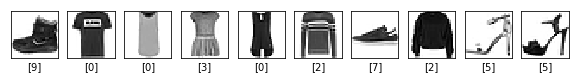

In [10]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    plt.xlabel([trainY[i]])
plt.show()

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
import numpy

In [12]:
model = Sequential()
#Adding 3 dense layers
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(8,init='uniform'))
model.add(Dense(10,init='uniform'))
# Compile model
model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, kernel_initializer="uniform")`
  """


### Execute the model using model.fit()

In [17]:
model.fit(trainX,trainY,  nb_epoch=5, batch_size=32)

Epoch 1/5
 3392/60000 [>.............................] - ETA: 2s - loss: 12.3556 - acc: 0.0949

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 3s 56us/step - loss: 12.3813 - acc: 0.1000
Epoch 2/5
60000/60000 [==============================] - 3s 57us/step - loss: 12.3813 - acc: 0.1000
Epoch 3/5
60000/60000 [==============================] - 4s 60us/step - loss: 12.3813 - acc: 0.1000
Epoch 4/5
60000/60000 [==============================] - 4s 59us/step - loss: 12.3813 - acc: 0.1000
Epoch 5/5
60000/60000 [==============================] - 3s 57us/step - loss: 12.3813 - acc: 0.1000


### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [18]:
from keras.layers import BatchNormalization

In [19]:
model1 = Sequential()
#Adding 3 dense layers
model1.add(BatchNormalization(input_shape=trainX.shape[1:]))
model1.add(Flatten(input_shape=(28, 28)))
model1.add(Dense(8,init='uniform'))
model1.add(Dense(10,init='uniform'))
# Compile model
model1.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, kernel_initializer="uniform")`
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, kernel_initializer="uniform")`
  


### Execute the model

In [20]:
model1.fit(trainX,trainY, nb_epoch=10, batch_size=20)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 8s 128us/step - loss: 3.8519 - acc: 0.2325
Epoch 2/10
60000/60000 [==============================] - 7s 114us/step - loss: 2.3745 - acc: 0.2657
Epoch 3/10
60000/60000 [==============================] - 7s 119us/step - loss: 2.4131 - acc: 0.2494
Epoch 4/10
60000/60000 [==============================] - 7s 114us/step - loss: 2.4259 - acc: 0.2029
Epoch 5/10
60000/60000 [==============================] - 7s 114us/step - loss: 2.5977 - acc: 0.1888
Epoch 6/10
60000/60000 [==============================] - 7s 117us/step - loss: 2.5830 - acc: 0.2512
Epoch 7/10
60000/60000 [==============================] - 7s 113us/step - loss: 2.5004 - acc: 0.2914
Epoch 8/10
60000/60000 [==============================] - 7s 116us/step - loss: 2.5367 - acc: 0.2802
Epoch 9/10
60000/60000 [==============================] - 7s 113us/step - loss: 2.5848 - acc: 0.3047
Epoch 10/10
60000/60000 [==============================] - 7s 119us/step - loss: 2.4096 - a

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [21]:
sgd = keras.optimizers.SGD(lr=0.001)
model1.compile(optimizer=sgd, 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
model1.fit(trainX,trainY, nb_epoch=20, batch_size=64)

Epoch 1/20
 2880/60000 [>.............................] - ETA: 2s - loss: 2.3065 - acc: 0.2549

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 3s 50us/step - loss: 2.2554 - acc: 0.2608
Epoch 2/20
60000/60000 [==============================] - 3s 50us/step - loss: 2.2416 - acc: 0.2614
Epoch 3/20
60000/60000 [==============================] - 3s 51us/step - loss: 2.2527 - acc: 0.2602
Epoch 4/20
60000/60000 [==============================] - 3s 51us/step - loss: 2.2581 - acc: 0.2602
Epoch 5/20
60000/60000 [==============================] - 3s 49us/step - loss: 2.2558 - acc: 0.2615
Epoch 6/20
60000/60000 [==============================] - 3s 50us/step - loss: 2.2610 - acc: 0.2623
Epoch 7/20
60000/60000 [==============================] - 3s 52us/step - loss: 2.2566 - acc: 0.2637
Epoch 8/20
60000/60000 [==============================] - 3s 52us/step - loss: 2.2577 - acc: 0.2615
Epoch 9/20
60000/60000 [==============================] - 3s 48us/step - loss: 2.2636 - acc: 0.2626
Epoch 10/20
60000/60000 [==============================] - 3s 50us/step - loss: 2.2580 - acc: 0.2612
Epoch 11/2

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [46]:
model3 = Sequential()
#Adding 3 dense layers
model3.add(BatchNormalization(input_shape=trainX.shape[1:]))
model3.add(Flatten(input_shape=(28, 28)))
model3.add(Dense(100,activation='sigmoid'))
model3.add(Dense(10,activation='softmax'))


In [38]:
sgd = keras.optimizers.SGD(lr=0.03)

In [49]:
# Compile model
model3.compile(optimizer=sgd, 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [50]:
model3.fit(trainX,trainY, nb_epoch=20, batch_size=64)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.3616 - acc: 0.8725
Epoch 2/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.3516 - acc: 0.8758
Epoch 3/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.3428 - acc: 0.8783
Epoch 4/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.3353 - acc: 0.8814
Epoch 5/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.3272 - acc: 0.8846
Epoch 6/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.3201 - acc: 0.8877
Epoch 7/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.3132 - acc: 0.8889
Epoch 8/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.3072 - acc: 0.8913
Epoch 9/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.3012 - acc: 0.8935
Epoch 10/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.2956 - acc: 0.8960

## Review model

In [58]:
import numpy as np

In [59]:
y_pred1 = model1.predict(testX)
test_result=np.argmax(y_pred1,axis=1)
test_result[0:5]

array([7, 4, 0, 0, 6], dtype=int64)

### Run the model

In [62]:
scores = model3.evaluate(testX, testY)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

10000/10000 [==============================] - 1s 80us/step
acc: 87.95%
